## Baseline model test
#### Trivial DNN
Followed this: https://www.tensorflow.org/tutorials/load_data/numpy
&nbsp;

and some part of this: https://www.tensorflow.org/tutorials/images/classification


In [68]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import sys

In [69]:
pd.set_option('display.max_columns', 500)
# np.set_printoptions(threshold=np.inf)

In [70]:
file = '../data/home_sale_data_324.csv'

data = pd.read_csv(file)
labels = data['label']
data.drop(['label'], axis=1, inplace=True)
data

,OverallQual,GrLivArea,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,TotalSF,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,Fireplaces,BsmtQual_Ex,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,GarageType_Attchd,MSSubClass_60,KitchenQual_Gd,LotArea,ExterQual_Ex,Neighborhood_NridgHt,BsmtFinSF1,Exterior1st_VinylSd,WoodDeckSF,FireplaceQu_Gd,Exterior2nd_VinylSd,CentralAir_Y,LotFrontage,GarageCond_TA,Total_sqr_footage,PavedDrive_Y,GarageQual_TA,GarageYrBlt,SaleType_New,SaleCondition_Partial,BsmtQual_Gd,HalfBath,hasgarage,BsmtExposure_Gd,LotShape_IR1,Electrical_SBrkr,MSZoning_RL,MasVnrType_Stone,2ndFlrSF,BsmtFullBath,MasVnrType_BrkFace,Neighborhood_NoRidge,HouseStyle_2Story,RoofStyle_Hip,GarageFinish_RFn,GarageType_BuiltIn,hasbsmt,FireplaceQu_Ex,BsmtUnfSF,Neighborhood_StoneBr,FireplaceQu_TA,BedroomAbvGr,Neighborhood_Somerst,Fence_None,LandContour_HLS,LotConfig_CulDSac,BsmtCond_TA,BsmtExposure_Av,MSZoning_FV,Neighborhood_Timber,Functional_Typ,Neighborhood_CollgCr,Alley_None,BsmtFinType2_Unf,ExterCond_TA,Condition1_Norm,has2ndfloor,MSSubClass_120,LotShape_IR2,BldgType_1Fam,Heating_GasA,ScreenPorch,Exterior1st_CemntBd,BsmtCond_Gd,Exterior2nd_CmentBd,Neighborhood_Veenker,Neighborhood_Crawfor,RoofMatl_WdShngl,Condition1_PosN,Condition2_PosA,Neighborhood_Gilbert,MSSubClass_20,GarageQual_Gd,haspool,Condition2_PosN,MiscFeature_None,Neighborhood_NWAmes,Neighborhood_ClearCr,PoolArea,Condition1_PosA,RoofMatl_WdShake,BldgType_TwnhsE,Exterior2nd_ImStucc,BsmtExposure_Mn,3SsnPorch,LandSlope_Mod,LotShape_IR3,Neighborhood_SawyerW,YrSold_2007,ExterCond_Ex,Neighborhood_Blmngtn,BsmtFinType2_GLQ,Exterior1st_Stone,Exterior2nd_BrkFace,Exterior1st_BrkFace,LandContour_Low,HouseStyle_2.5Fin,Condition1_RRNn,LandSlope_Sev,MoSold_8,Alley_Pave,SaleType_Con,Condition1_RRAn,MoSold_7,SaleType_CWD,LotConfig_FR3,MoSold_9,MoSold_11,GarageCond_Gd,MoSold_1,BsmtFinType2_ALQ,MSSubClass_75,GarageQual_Ex,RoofStyle_Shed,MoSold_12,MoSold_6,RoofStyle_Flat,RoofMatl_Tar&Grv,YrSold_2009,MoSold_2,Fence_GdPrv,Foundation_Wood,HouseStyle_2.5Unf,LotConfig_Corner,LotConfig_FR2,YrSold_2006,MoSold_10,YrSold_2008,SaleType_ConLI,MSSubClass_80,Condition2_Norm,RoofStyle_Mansard,FireplaceQu_Fa,MiscFeature_Gar2,HouseStyle_SLvl,Exterior1st_Plywood,GarageType_2Types,Heating_OthW,BsmtFinSF2,Exterior2nd_Stone,GarageCond_Ex,MoSold_5,MoSold_3,MSSubClass_40,SaleCondition_Alloca,MiscFeature_Othr,Heating_GasW,Condition1_RRNe,Foundation_Stone,Exterior1st_CBlock,Functional_Maj1,Exterior2nd_AsphShn,BsmtFinType2_LwQ,BsmtHalfBath,Condition2_Feedr,BsmtFinType2_BLQ,SaleCondition_Family,Exterior2nd_CBlock,BsmtFinType2_Rec,Exterior1st_AsphShn,Condition2_Artery,Neighborhood_Mitchel,Exterior1st_BrkComm,Fence_MnWw,RoofStyle_Gambrel,Condition2_RRNn,Neighborhood_Blueste,Functional_Sev,Exterior2nd_Plywood,YrSold_2010,GarageType_Basment,SaleType_Oth,Neighborhood_NPkVill,MoSold_4,MSSubClass_85,LandSlope_Gtl,ExterCond_Po,MSSubClass_70,SaleType_ConLw,BsmtCond_Po,MasVnrType_BrkCmn,HouseStyle_1Story,ExterCond_Gd,LandContour_Lvl,Exterior2nd_Brk Cmn,MSZoning_RH,Condition1_RRAe,OverallCond,MiscVal,FireplaceQu_Po,Exterior1st_WdShing,LowQualFinSF,Functional_Min1,HeatingQC_Po,Functional_Mod,MiscFeature_Shed,GarageQual_Po,Exterior1st_Stucco,Exterior2nd_Stucco,BsmtFinType1_ALQ,RoofMatl_CompShg,Exterior2nd_Wd Shng,Functional_Min2,SaleType_ConLD,Heating_Wall,Neighborhood_SWISU,GarageType_CarPort,SaleCondition_AdjLand,MSSubClass_45,HouseStyle_SFoyer,Electrical_FuseP,Exterior2nd_HdBoard,LotConfig_Inside,HouseStyle_1.5Unf,MSSubClass_90,BldgType_Duplex,PavedDrive_P,BsmtFinType1_LwQ,MSSubClass_180,Functional_Maj2,Exterior1st_HdBoard,GarageCond_Po,SaleCondition_Normal,LandContour_Bnk,SaleType_COD,Fence_GdWo,Heating_Grav,MSSubClass_190,BldgType_2fmCon,KitchenAbvGr,BsmtFinType1_BLQ,BsmtFinType1_Unf,Neighborhood_BrDale,Condition1_Feedr,BldgType_Twnhs,MSSubClass_160,HeatingQC_Gd,Neighborhood_Sawyer,Condition1_Artery,Exterio

In [71]:
'''one-hot encode the labels'''

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
# print(list(integer_encoded))
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)
print(labels)


[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [72]:
'''test reshape'''
tmp = [[1,2,3,4], [5,6, 7,8], [9,10,11,12]]
tmp = np.array(tmp)
tmp.shape
tmp.reshape(3,2,2)


array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [73]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

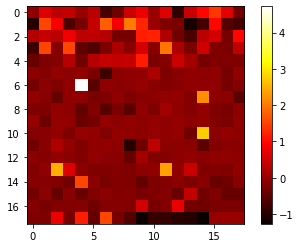

In [74]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18, 18)
plt.imshow(a11, cmap='hot')
plt.colorbar()
plt.show()

In [75]:
labels.shape

(2911, 4)

In [76]:
train_examples = data_np
train_examples.shape

(2911, 18, 18)

In [77]:
val_examples = train_examples[-291:]
train_examples = train_examples[:-291]
val_labels = labels[-291:]
train_labels = labels[:-291]

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [78]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(18, 18), dtype=tf.float64, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [79]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [80]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 64

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(18, 18)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])




In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 324)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               41600     
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 42,116
Trainable params: 42,116
Non-trainable params: 0
_________________________________________________________________


In [82]:
epochs = 10
history = model.fit(train_dataset, epochs=epochs, validation_data=(val_examples, val_labels))


Epoch 1/10


ValueError: in user code:

    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/engine/training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/engine/training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 459, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/metrics.py", line 178, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/metrics.py", line 729, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/metrics.py", line 4078, in sparse_categorical_accuracy
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](Cast_2)' with input shapes: [?,4].


In [14]:
# history.history

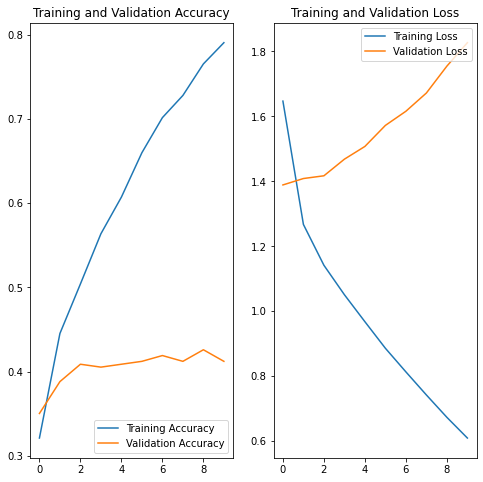

In [15]:
from matplotlib import pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.6444 - sparse_categorical_accuracy: 0.9575


[0.6444269418716431, 0.9575000405311584]

In [ ]:
#  model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
#                   activation='relu'),
#    tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
#                   activation='relu'),
#    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#  #   tf.keras.layers.Dropout(0.25),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(128, activation='relu'),
#  #   tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Dense(10, activation='softmax')
#  ])
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     metrics=['accuracy'],
# )
# model.fit(
#     train_dataset,
#     epochs=12,
    
# )